## In this notebook, includes 3 features:
Word frequency feature

Bigram frequency feature 

Tagged Bigram feature

## 1. Import package and my function .py file

In [1]:
import fakenewsutilities as fns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
import numpy as np

## 2. Read the data, initial data cleaning

In [2]:
df = pd.read_csv('tweets_labeled.csv')
#I didn't remove all punctuation at first step, in case we may include punctuation in generating features.
df_clean = fns.wash_pandas_str(df)
df_clean.head()  

,tweet_id,text,label
0,1161040537207463936,'The Endangered Species Act saved the bald eag...,1
1,1176360756239118342,"'Interesting concept impeach first, find fact...",1
2,1099036648573145088,'#BuildTheWall #DeportThemAll,0
3,1092915693203480577,'Why would the MEXICAN GOVT fund this? Who are...,0
4,1149038450668187654,'Sweden Announces Plan To Get 100% Of Energy F...,0


## 3. Data Analysis
during this step,I found the biased language behaviours between true and fake tweets,and decide to make a Bayes-derived feature.

In [3]:
#get the tweets and lables, split the data into 70% training data and 30% test data
X = df_clean.iloc[:,0:2]
Y = df_clean.iloc[:,2]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 45, test_size  = 0.3)

In [4]:
# train the training data by using Naive Bayes    
# I tested with 500, 1000, 1500, 2000, 2500 and 3000 high frequency words, 
# by comparing the accuracy and running time, I decided to use 2000 high frequency words.
train_df, fake_prob_prior= fns.naive_bayes_train(X_train, Y_train)

In [5]:
train_df.head()

,word,cnt_in_true,cnt_in_fake,freq_true,freq_fake,total_cnt
12,trump,8904,12574,0.082991,0.249020,21478
180,us,4488,2998,0.041831,0.059373,7486
26,illegal,5838,418,0.054414,0.008278,6256
604,gun,5770,432,0.053780,0.008555,6202
6,new,3162,2900,0.029472,0.057433,6062


In [6]:
import importlib

In [7]:
importlib.reload(fns)

<module 'fakenewsutilities' from 'C:\\Users\\Mushroom\\Desktop\\FML\\AI project\\fakenewsutilities.py'>

C:\Users\Mushroom\Desktop\FML\AI project\fakenewsutilities.py:138: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


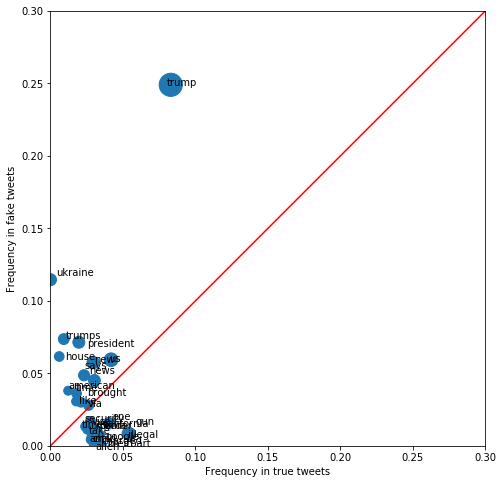

In [8]:
# plot the usage bias of the words among true/fake tweets.
# X-axis is the frequency of the words in true tweets, y-axis is the frequency of the words in fake tweets.
# red line indicates equal possibility. Farther from the redline indicates that the usage of this word is more biased.

# show only 30words here, because too much words would be all mess
# No. of words or graph limit can be played with

fns.plot_word_map(train_df[0:30],xlimit = 0.3)

From above we can see, people sent fake tweets and true tweets have different wording habits.

We can calculating the frequency of 2000 individual words in true and fake tweets.

Then we can construct features based on word frequency using a similar procedure as Naive Bayes.

Future more, we can also use bigram (pair of word) frequency as feature.

After tagging the bigram, we can also use bigram-tagging as feature. 

## 4. Generate Features  

as this stage takes long time, I added a print() in each steps to get the real-time progress

### 4.1 Word frequency feature part :

In [9]:
# get word frequency feature for svm
word_frequency_feature_train = fns.naive_bayes_generate_feature(train_df, fake_prob_prior, X_train, Y_train)

1000 processed, 0.932000
2000 processed, 0.929500
3000 processed, 0.929000
4000 processed, 0.929500
5000 processed, 0.930800
6000 processed, 0.933333
7000 processed, 0.932286
8000 processed, 0.932875
9000 processed, 0.933000
10000 processed, 0.931600
11000 processed, 0.931455
12000 processed, 0.931250
13000 processed, 0.930692
14000 processed, 0.931214
15000 processed, 0.930200
16000 processed, 0.930625
17000 processed, 0.930059
18000 processed, 0.931000
19000 processed, 0.931684
20000 processed, 0.931550
21000 processed, 0.932238
22000 processed, 0.932318
23000 processed, 0.932130
24000 processed, 0.932167
25000 processed, 0.932480
26000 processed, 0.931846
27000 processed, 0.932630
28000 processed, 0.933179
29000 processed, 0.933172
30000 processed, 0.932933
31000 processed, 0.932742
32000 processed, 0.932438
33000 processed, 0.932364
34000 processed, 0.932235
35000 processed, 0.932343
36000 processed, 0.932083
37000 processed, 0.932027
38000 processed, 0.932053
39000 processed, 0.93

### 4.2 Bigram frequency feature part :

In [10]:
#train the training data by using Naive Bayes 
# I tested with 500, 1000, 1500, 2000, 2500 and 3000 high frequency bigrams, 
# by comparing the accuracy and running time, I decided to use 2000 high frequency bigrams.
train_df_bigrm, fake_prob_prior = fns.naive_bayes_bigrm_train(X_train, Y_train)

In [11]:
# generate bigram frequency feature for svm
bigrm_frequency_feature_train = fns.naive_bayes_generate_feature_bigrm(train_df_bigrm, fake_prob_prior, X_train, Y_train)


1000 processed 0.894000
2000 processed 0.883000
3000 processed 0.886667
4000 processed 0.887000
5000 processed 0.887800
6000 processed 0.890000
7000 processed 0.891000
8000 processed 0.889875
9000 processed 0.889333
10000 processed 0.888700
11000 processed 0.889273
12000 processed 0.888667
13000 processed 0.888154
14000 processed 0.888786
15000 processed 0.886867
16000 processed 0.887563
17000 processed 0.887824
18000 processed 0.887833
19000 processed 0.888316
20000 processed 0.887950
21000 processed 0.887952
22000 processed 0.888545
23000 processed 0.888609
24000 processed 0.888583
25000 processed 0.888960
26000 processed 0.888615
27000 processed 0.889037
28000 processed 0.889250
29000 processed 0.889483
30000 processed 0.889500
31000 processed 0.889419
32000 processed 0.888906
33000 processed 0.888909
34000 processed 0.889059
35000 processed 0.889029
36000 processed 0.888528
37000 processed 0.888595
38000 processed 0.888947
39000 processed 0.888436
40000 processed 0.888850
41000 pro

### 4.3 Bigram- tagging frequency feature part: 

source to learn how to use pos-tags https://stackoverflow.com/questions/60363904/how-to-use-the-universal-pos-tags-with-nltk-pos-tag-function

Bigrams are tagged into their parts-of-speech. 

For example, ('red', 'apple') will be tagged as ('ADJ', 'NOUN').

We use tagset = universal, which has only 18 different types of part-of-speech.

Therefore, the unique tagged bigrams come in 18\*18 = 324 types.

This enables us to build a 324-dimensional feature, which can be fed into SVM directly (which is less efficient for untreated bigrams, since they
may come in many thousands of different types)

In [11]:
# Bigram of Tags using SVM
train_tagged_bigram_features = fns.tags_bigram_generate_features(X_train) 

1000 processed
2000 processed
3000 processed
4000 processed
5000 processed
6000 processed
7000 processed
8000 processed
9000 processed
10000 processed
11000 processed
12000 processed
13000 processed
14000 processed
15000 processed
16000 processed
17000 processed
18000 processed
19000 processed
20000 processed
21000 processed
22000 processed
23000 processed
24000 processed
25000 processed
26000 processed
27000 processed
28000 processed
29000 processed
30000 processed
31000 processed
32000 processed
33000 processed
34000 processed
35000 processed
36000 processed
37000 processed
38000 processed
39000 processed
40000 processed
41000 processed
42000 processed
43000 processed
44000 processed
45000 processed
46000 processed
47000 processed
48000 processed
49000 processed
50000 processed
51000 processed
52000 processed
53000 processed
54000 processed
55000 processed
56000 processed
57000 processed
58000 processed
59000 processed
60000 processed
61000 processed
62000 processed
63000 processed
6

##   5. Training the algorithm 
Support vector machineuse algorithm is used.

### 5.1 for word frequency feature:

In [15]:
X1 = fns.conv_array(word_frequency_feature_train)
y = Y_train

In [16]:
# the default parameter for gamma should be 'scale'. I first tried svm.SVC() without written parameters, and a warning sign popped out, saying I should set gamma='scale'.
clf_word = svm.SVC(gamma='scale')
clf_word.fit(X1, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
#get word frequency of testing data set
word_frequency_feature_test = fns.naive_bayes_generate_feature(train_df, fake_prob_prior, X_test, Y_test)
X2 = fns.conv_array(word_frequency_feature_test)

1000 processed, 0.940000
2000 processed, 0.937500
3000 processed, 0.934333
4000 processed, 0.936000
5000 processed, 0.934400
6000 processed, 0.934167
7000 processed, 0.933857
8000 processed, 0.934125
9000 processed, 0.933667
10000 processed, 0.933400
11000 processed, 0.933000
12000 processed, 0.933417
13000 processed, 0.934000
14000 processed, 0.934571
15000 processed, 0.934533
16000 processed, 0.934937
17000 processed, 0.934235
18000 processed, 0.934167
19000 processed, 0.934053
20000 processed, 0.934200
21000 processed, 0.933952
22000 processed, 0.933864
23000 processed, 0.933565
24000 processed, 0.932875
25000 processed, 0.933000
26000 processed, 0.932885
27000 processed, 0.932481
28000 processed, 0.932571
29000 processed, 0.932793
30000 processed, 0.932667
31000 processed, 0.932419
32000 processed, 0.932719
33000 processed, 0.932667
34000 processed, 0.932353
35000 processed, 0.932114
36000 processed, 0.932250
37000 processed, 0.932000
38000 processed, 0.932105
39000 processed, 0.93

###  5.2 for bigram frequency

In [17]:
X3 = fns.conv_array(bigrm_frequency_feature_train)
y = Y_train

In [69]:
clf_bigrm = svm.SVC(gamma='scale')
clf_bigrm.fit(X3, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# get bigram frequency testing data set
bigrm_frequency_feature_test = fns.naive_bayes_generate_feature_bigrm(train_df_bigrm, fake_prob_prior, X_test, Y_test)
X4 = fns.conv_array(bigrm_frequency_feature_test)

1000 processed 0.905000
2000 processed 0.899500
3000 processed 0.899667
4000 processed 0.894750
5000 processed 0.895800
6000 processed 0.895667
7000 processed 0.895571
8000 processed 0.894375
9000 processed 0.894000
10000 processed 0.894100
11000 processed 0.893818
12000 processed 0.895500
13000 processed 0.895692
14000 processed 0.895357
15000 processed 0.894867
16000 processed 0.895687
17000 processed 0.894882
18000 processed 0.894389
19000 processed 0.894632
20000 processed 0.894350
21000 processed 0.893714
22000 processed 0.893136
23000 processed 0.892261
24000 processed 0.891958
25000 processed 0.892120
26000 processed 0.891731
27000 processed 0.891259
28000 processed 0.891143
29000 processed 0.890931
30000 processed 0.890500
31000 processed 0.890935
32000 processed 0.890625
33000 processed 0.890515
34000 processed 0.890206
35000 processed 0.889657
36000 processed 0.889917
37000 processed 0.889730
38000 processed 0.889711
39000 processed 0.889769
40000 processed 0.889700
41000 pro

### 5.3 for tagged bigram feature

In [34]:
clf_tags = svm.SVC(gamma='scale')
clf_tags.fit(train_tagged_bigram_features, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
test_tagged_bigram_features = fns.tags_bigram_generate_features(X_test)

1000 processed
2000 processed
3000 processed
4000 processed
5000 processed
6000 processed
7000 processed
8000 processed
9000 processed
10000 processed
11000 processed
12000 processed
13000 processed
14000 processed
15000 processed
16000 processed
17000 processed
18000 processed
19000 processed
20000 processed
21000 processed
22000 processed
23000 processed
24000 processed
25000 processed
26000 processed
27000 processed
28000 processed
29000 processed
30000 processed
31000 processed
32000 processed
33000 processed
34000 processed
35000 processed
36000 processed
37000 processed
38000 processed
39000 processed
40000 processed
41000 processed
42000 processed
43000 processed
44000 processed
45000 processed
46000 processed
47000 processed
48000 processed
49000 processed
50000 processed
51000 processed
52000 processed
53000 processed
54000 processed
55000 processed
56000 processed
57000 processed
58000 processed
59000 processed
60000 processed
61000 processed
62000 processed
63000 processed
6

## 6.Evaluation the model

### 6.1 for word frequency feature:

In [70]:
Y_test_nparray = np.array(Y_test)
Y_predict = clf_word.predict(X2)

clf_word.score(X2, Y_test)

0.9402709177486617

Accuracy for 2000 word frequency feature is 94%.


In [71]:
# get the confusion matrix to see how our model worked on test set.  
cm_word = confusion_matrix(Y_test, Y_predict)
cm_word 

array([[44626,  1547],
       [ 2492, 18957]], dtype=int64)

In [72]:
# details of accuracy and recall :
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     46173
           1       0.92      0.88      0.90     21449

    accuracy                           0.94     67622
   macro avg       0.94      0.93      0.93     67622
weighted avg       0.94      0.94      0.94     67622



The precision for fake tweets is 92% , for true tweets is better, 95%

The recall of fake tweets is 88%, about 12% tweets were wrongly predictioned.

Since the prior probability of fake tweets is 0.32, tweets containing now words in the 2000-word list are more likely to be predictioned as true. 

This results in some fake tweets not detected, thus lower recall for fake tweets.

Longer list of words can improve the performance.

### 6.2 for bigram frequency feature

In [73]:
Y_test_nparray = np.array(Y_test)
Y_predict_2 = clf_bigrm.predict(X4)

clf_bigrm.score(X4, Y_test)

0.8925497619118038

Accuracy for 2000 bigram frequency feature is 89.2%.

In [40]:
# get the confusion matrix to see how our model worked on test set.  
cm_bigrm = confusion_matrix(Y_test, Y_predict_2)
cm_bigrm

array([[44204,  1969],
       [ 5180, 16269]], dtype=int64)

In [41]:
# details of accuracy and recall :
print(classification_report(Y_test, Y_predict_2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     46173
           1       0.89      0.76      0.82     21449

    accuracy                           0.89     67622
   macro avg       0.89      0.86      0.87     67622
weighted avg       0.89      0.89      0.89     67622



The precision for fake tweets is 89% , for true tweets is better, 90%

The recall of fake tweets is 76%, about 24% tweets were wrong predictioned.

The main reason for the less good performance is that 2000 bigrams cannot cover as many tweets as using 2000 single words. 

Since the prior probability of being fake is 0.32, the fake tweets not covered by the 2000 bigrams are predicted to be true. 

Thus the recall is even lower than using single words.

### 6.3 for tagged bigram feature

In [42]:
clf_tags.score(test_tagged_bigram_features, Y_test)


0.9339859808937919

Accuracy for tagged bigram feature is 93.3%.

In [43]:
Y_predict_3 = clf_tags.predict(test_tagged_bigram_features)

In [44]:
# get the confusion matrix to see how our model worked on test set.  
cm_tags = confusion_matrix(Y_test, Y_predict_3)
cm_tags

array([[44879,  1294],
       [ 3170, 18279]], dtype=int64)

In [46]:
# details of accuracy and recall :
print(classification_report(Y_test, Y_predict_3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     46173
           1       0.93      0.85      0.89     21449

    accuracy                           0.93     67622
   macro avg       0.93      0.91      0.92     67622
weighted avg       0.93      0.93      0.93     67622



The precision for fake tweets is 93%, and similar for true tweets.

The recall of fake tweets is 85%,which is the bottleneck of this feature,

### 6.4 Combine three features together

In [53]:
 df_total = pd.read_csv('df_features_yuan.csv')

In [54]:
df_total.head()

,Yuan_Feature_1,Yuan_Feature_2,"('ADJ', 'ADJ')","('ADJ', 'ADP')","('ADJ', 'ADV')","('ADJ', 'AUX')","('ADJ', 'CCONJ')","('ADJ', 'DET')","('ADJ', 'INTJ')","('ADJ', 'NOUN')",...,"('.', 'NUM')","('.', 'PART')","('.', 'PRON')","('.', 'PROPN')","('.', 'PUNCT')","('.', 'SCONJ')","('.', 'SYM')","('.', 'VERB')","('.', 'X')","('.', '.')"
0,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.364385e-07,2.925688e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.986062e-04,8.133333e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.179312e-14,7.841145e-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
clf_total = svm.SVC(gamma='scale')

In [56]:
X_train_total, X_test_total, Y_train_total, Y_test_total = train_test_split(df_total, Y, random_state = 45, test_size  = 0.3)

In [57]:
clf_total.fit(X_train_total, Y_train_total)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
clf_total.score(X_test_total,Y_test_total)

0.967037354707048

Accuracy for combined feature is 96.7%.

In [63]:
Y_predict_4 = clf_total.predict(X_test_total)

In [64]:
cm_total = confusion_matrix(Y_test_total, Y_predict_4)

In [65]:
cm_total

array([[45028,  1145],
       [ 1084, 20365]], dtype=int64)

In [66]:
print(classification_report(Y_test_total, Y_predict_4))    

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     46173
           1       0.95      0.95      0.95     21449

    accuracy                           0.97     67622
   macro avg       0.96      0.96      0.96     67622
weighted avg       0.97      0.97      0.97     67622



The precision for fake tweets is 95% , for true tweets is 98% , both quite good.

The recall of fake tweets is also quite good 95%

Also the recall for the fake tweets is significantly improved, which means these features are complimentary.

#### As the third feature tagged bigram is 324-dimensional, we can not draw the decision boundary.